In [ ]:
def solve(L, T, k, N, M):
    dx = L/N
    dt = T/M
    alpha = k * dt / dx**2

    x = np.arange(0, L + 0.001, dx)

    u0 = np.zeros_like(x)
    u1 = np.zeros_like(x)

    for i in range(N+1):
        u0[i] = np.sin(np.pi * x[i])

    for j in range(M):
        for i in range(1, N):
            u1[i] = u0[i] + alpha * (u0[i + 1] - 2 * u0[i] + u0[i - 1])
        u1[0] = 0
        u1[N] = 0
        u0 = u1.copy()

    return x, u1

def plot(x, sol, u):
    plt.plot(x, u, 'bo-', label = 'numerical')
    plt.plot(x, sol, 'o', color = 'C1', label = 'analytical')
    plt.legend()

# k=1

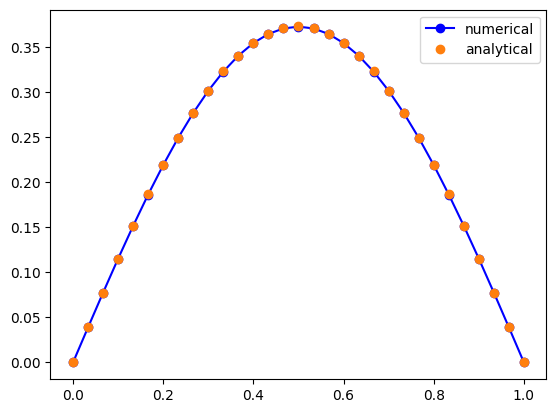

In [ ]:
L = 1
T = 0.1
k = 1
N = 30
M = 1000

x, u = solve(L, T, k, N, M)
sol = [np.sin(np.pi * x_) * np.exp(-np.pi**2 * T) for x_ in x]

plot(x, u, sol)

## Test 1

Text(0.5, 1.0, 'Absolute Error')

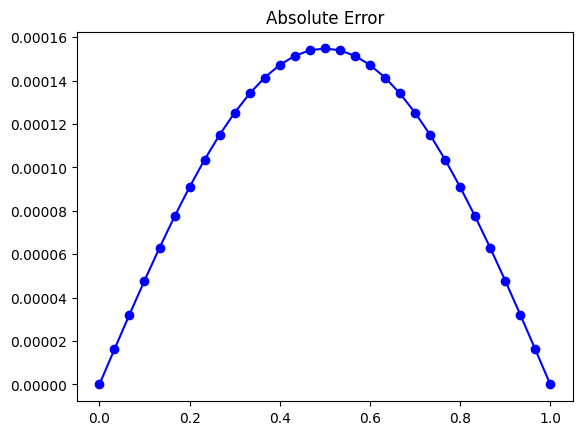

In [ ]:
plt.plot(x, np.abs(u - sol), 'bo-')
plt.title('Absolute Error')

## Test 2

plt.plot(x, np.abs(u - sol) / sol, 'bo-')
plt.title('Relative Error')

# k=4

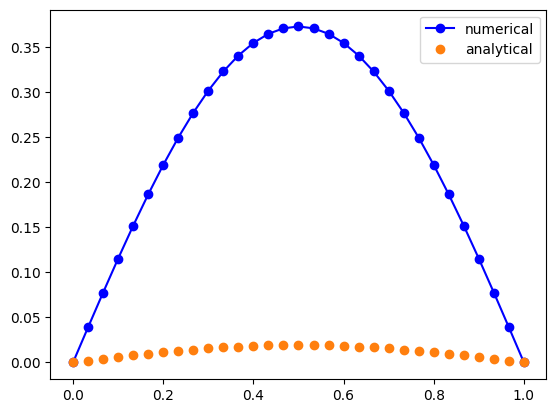

In [ ]:
L = 1
T = 0.1
k = 4
N = 30
M = 10000

x, u = solve(L, T, k, N, M)
sol = [ for x_ in x]

plot(x, u, sol)

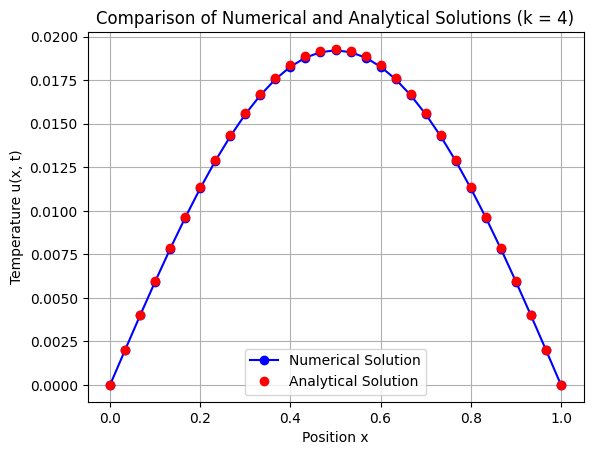

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Numerical solution function
def solve(L, T, k, N, M):
    dx = L / N
    dt = T / M
    alpha = k * dt / dx**2

    x = np.linspace(0, L, N + 1)
    u0 = np.zeros_like(x)
    u1 = np.zeros_like(x)

    # Initial condition
    for i in range(N + 1):
        u0[i] = np.sin(np.pi * x[i])

    # Time-stepping loop
    for j in range(M):
        for i in range(1, N):
            u1[i] = u0[i] + alpha * (u0[i + 1] - 2 * u0[i] + u0[i - 1])
        u1[0] = 0  # Boundary condition at x = 0
        u1[N] = 0  # Boundary condition at x = L
        u0 = u1.copy()

    return x, u1

# Plotting function
def plot(x, numerical, analytical):
    plt.plot(x, numerical, 'bo-', label='Numerical Solution')  # Blue dots with line
    plt.plot(x, analytical, 'ro', label='Analytical Solution')  # Red dots only
    plt.title("Comparison of Numerical and Analytical Solutions (k = 4)")
    plt.xlabel("Position x")
    plt.ylabel("Temperature u(x, t)")
    plt.legend()
    plt.grid()
    plt.show()

# Parameters
L = 1          # Length of the rod
T = 0.1        # Maximum time
k = 4          # Thermal diffusivity
N = 30         # Number of spatial steps
M = 1000       # Number of time steps

# Solve numerically
x, u = solve(L, T, k, N, M)

# Compute analytical solution for k = 4
sol = [np.sin(np.pi * x_) * np.exp(-np.pi**2 * k * T) for x_ in x]

# Plot both solutions
plot(x, u, sol)



dx = 0.02, dt = 2e-05, alpha = 0.00015000000000000001 (stable: True)


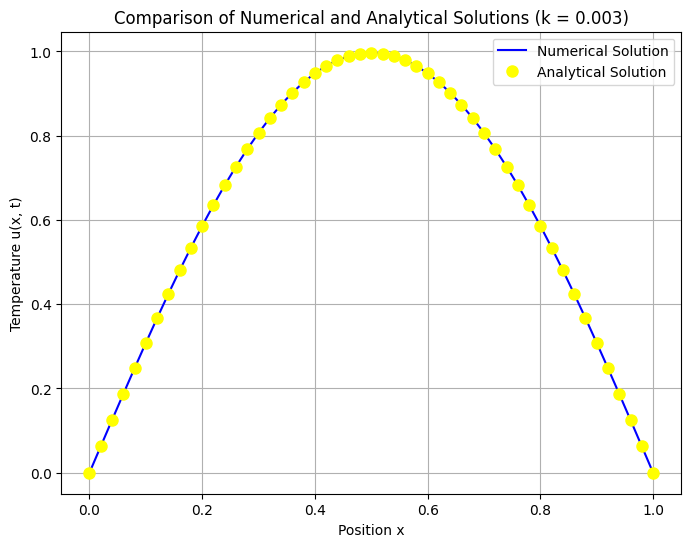

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Numerical solution function
def solve(L, T, k, N, M):
    dx = L / N
    dt = min(T / M, 0.5 * dx**2 / k)  # Ensure stability condition
    alpha = k * dt / dx**2

    # Debug: Print stability condition
    print(f"dx = {dx}, dt = {dt}, alpha = {alpha} (stable: {alpha <= 0.5})")

    x = np.linspace(0, L, N + 1)
    u0 = np.zeros_like(x)
    u1 = np.zeros_like(x)

    # Initial condition
    for i in range(N + 1):
        u0[i] = np.sin(np.pi * x[i])

    # Time-stepping loop
    for j in range(M):
        for i in range(1, N):
            u1[i] = u0[i] + alpha * (u0[i + 1] - 2 * u0[i] + u0[i - 1])
        u1[0] = 0  # Boundary condition at x = 0
        u1[N] = 0  # Boundary condition at x = L
        u0 = u1.copy()

    return x, u1

# Analytical solution function
def analytical_solution(x, T, k):
    return [np.sin(np.pi * x_) * np.exp(-np.pi**2 * k * T) for x_ in x]

# Plotting function
def plot_solutions(x, numerical, analytical):
    plt.figure(figsize=(8, 6))
    plt.plot(x, numerical, 'b-', label='Numerical Solution')  # Blue line
    plt.plot(x, analytical, 'o', color='yellow', label='Analytical Solution', markersize=8)  # Yellow dots
    plt.title("Comparison of Numerical and Analytical Solutions (k = 0.003)")
    plt.xlabel("Position x")
    plt.ylabel("Temperature u(x, t)")
    plt.legend()
    plt.grid()
    plt.show()

# Parameters
L = 1          # Length of the rod
T = 0.1        # Maximum time
k = 0.003      # Thermal diffusivity
N = 50         # Number of spatial steps
M = 5000       # Number of time steps

# Solve numerically
x, numerical = solve(L, T, k, N, M)

# Compute analytical solution
analytical = analytical_solution(x, T, k)

# Plot both solutions
plot_solutions(x, numerical, analytical)



In [18]:
import numpy as np

# Numerical solution function
def solve(L, T, k, N, M):
    dx = L / N
    dt = min(T / M, 0.5 * dx**2 / k)  # Ensure stability condition
    alpha = k * dt / dx**2

    # Debug: Print stability condition
    print(f"dx = {dx}, dt = {dt}, alpha = {alpha} (stable: {alpha <= 0.5})")

    x = np.linspace(0, L, N + 1)
    u0 = np.zeros_like(x)
    u1 = np.zeros_like(x)

    # Initial condition
    for i in range(N + 1):
        u0[i] = np.sin(np.pi * x[i])

    # Time-stepping loop
    for j in range(M):
        for i in range(1, N):
            u1[i] = u0[i] + alpha * (u0[i + 1] - 2 * u0[i] + u0[i - 1])
        u1[0] = 0  # Boundary condition at x = 0
        u1[N] = 0  # Boundary condition at x = L
        u0 = u1.copy()

    return x, u1

# Analytical solution function
def analytical_solution(x, T, k):
    return [np.sin(np.pi * x_) * np.exp(-np.pi**2 * k * T) for x_ in x]

# Error calculation function
def calculate_errors(numerical, analytical):
    epsilon = 1e-10  # Small constant to avoid division by zero
    absolute_error = np.abs(np.array(numerical) - np.array(analytical))
    relative_error = absolute_error / (np.abs(np.array(analytical)) + epsilon)
    return absolute_error, relative_error

# Testing function
def test_solution(L, T, k, N, M, tolerance=1e-3):
    print(f"Testing for k = {k} with N = {N}, M = {M}")

    # Solve numerically
    x, numerical = solve(L, T, k, N, M)

    # Compute analytical solution
    analytical = analytical_solution(x, T, k)

    # Calculate errors
    absolute_error, relative_error = calculate_errors(numerical, analytical)

    # Determine maximum errors
    max_abs_error = np.max(absolute_error)
    max_rel_error = np.max(relative_error)

    # Print results
    print(f"\nMax Absolute Error: {max_abs_error}")
    print(f"Max Relative Error: {max_rel_error}")

    # Determine pass or fail
    if max_abs_error < tolerance and max_rel_error < tolerance:
        print("Test passed!")
        return "passed"
    else:
        print("Test failed!")
        return "failed"

# Parameters
L = 1          # Length of the rod
T = 0.1        # Maximum time
k = 0.003      # Thermal diffusivity
N = 50         # Number of spatial steps
M = 5000       # Number of time steps
tolerance = 1e-3  # Error tolerance

# Run test
test_result = test_solution(L, T, k, N, M, tolerance)
print(f"\nFinal Test Result: {test_result.capitalize()}")


Testing for k = 0.003 with N = 50, M = 5000
dx = 0.02, dt = 2e-05, alpha = 0.00015000000000000001 (stable: True)

Max Absolute Error: 9.70210167539065e-07
Max Relative Error: 1.2210246372464834e-06
Test passed!

Final Test Result: Passed


In [19]:
import numpy as np

# Numerical solution function
def solve(L, T, k, N, M):
    dx = L / N
    dt = min(T / M, 0.5 * dx**2 / k)  # Ensure stability condition
    alpha = k * dt / dx**2

    # Debug: Print stability condition
    print(f"dx = {dx}, dt = {dt}, alpha = {alpha} (stable: {alpha <= 0.5})")

    x = np.linspace(0, L, N + 1)
    u0 = np.zeros_like(x)
    u1 = np.zeros_like(x)

    # Initial condition
    for i in range(N + 1):
        u0[i] = np.sin(np.pi * x[i])

    # Time-stepping loop
    for j in range(M):
        for i in range(1, N):
            u1[i] = u0[i] + alpha * (u0[i + 1] - 2 * u0[i] + u0[i - 1])
        u1[0] = 0  # Boundary condition at x = 0
        u1[N] = 0  # Boundary condition at x = L
        u0 = u1.copy()

    return x, u1

# Analytical solution function
def analytical_solution(x, T, k):
    return [np.sin(np.pi * x_) * np.exp(-np.pi**2 * k * T) for x_ in x]

# Error calculation function
def calculate_errors(numerical, analytical):
    epsilon = 1e-10  # Small constant to avoid division by zero
    absolute_error = np.abs(np.array(numerical) - np.array(analytical))
    relative_error = absolute_error / (np.abs(np.array(analytical)) + epsilon)
    return absolute_error, relative_error

# Testing function
def test_solution(L, T, k, N, M, tolerance=1e-3):
    print(f"Testing for k = {k} with N = {N}, M = {M}")

    # Solve numerically
    x, numerical = solve(L, T, k, N, M)

    # Compute analytical solution
    analytical = analytical_solution(x, T, k)

    # Calculate errors
    absolute_error, relative_error = calculate_errors(numerical, analytical)

    # Determine maximum errors
    max_abs_error = np.max(absolute_error)
    max_rel_error = np.max(relative_error)

    # Print results
    print(f"\nMax Absolute Error: {max_abs_error}")
    print(f"Max Relative Error: {max_rel_error}")

    # Determine pass or fail
    if max_abs_error < tolerance and max_rel_error < tolerance:
        print("Test passed!")
        return "passed"
    else:
        print("Test failed!")
        return "failed"

# Parameters
L = 1          # Length of the rod
T = 0.1        # Maximum time
k = 1          # Thermal diffusivity
N = 50         # Number of spatial steps
M = 5000       # Number of time steps
tolerance = 1e-3  # Error tolerance

# Run test for k = 1
test_result = test_solution(L, T, k, N, M, tolerance)
print(f"\nFinal Test Result for k = 1: {test_result.capitalize()}")


Testing for k = 1 with N = 50, M = 5000
dx = 0.02, dt = 2e-05, alpha = 0.05 (stable: True)

Max Absolute Error: 8.472478576482256e-05
Max Relative Error: 0.00022732225327680094
Test passed!

Final Test Result for k = 1: Passed


In [20]:
import numpy as np

# Numerical solution function
def solve(L, T, k, N, M):
    dx = L / N
    dt = min(T / M, 0.5 * dx**2 / k)  # Ensure stability condition
    alpha = k * dt / dx**2

    # Debug: Print stability condition
    print(f"dx = {dx}, dt = {dt}, alpha = {alpha} (stable: {alpha <= 0.5})")

    x = np.linspace(0, L, N + 1)
    u0 = np.zeros_like(x)
    u1 = np.zeros_like(x)

    # Initial condition
    for i in range(N + 1):
        u0[i] = np.sin(np.pi * x[i])

    # Time-stepping loop
    for j in range(M):
        for i in range(1, N):
            u1[i] = u0[i] + alpha * (u0[i + 1] - 2 * u0[i] + u0[i - 1])
        u1[0] = 0  # Boundary condition at x = 0
        u1[N] = 0  # Boundary condition at x = L
        u0 = u1.copy()

    return x, u1

# Analytical solution function
def analytical_solution(x, T, k):
    return [np.sin(np.pi * x_) * np.exp(-np.pi**2 * k * T) for x_ in x]

# Error calculation function
def calculate_errors(numerical, analytical):
    epsilon = 1e-10  # Small constant to avoid division by zero
    absolute_error = np.abs(np.array(numerical) - np.array(analytical))
    relative_error = absolute_error / (np.abs(np.array(analytical)) + epsilon)
    return absolute_error, relative_error

# Testing function
def test_solution(L, T, k, N, M, tolerance=1e-3):
    print(f"Testing for k = {k} with N = {N}, M = {M}")

    # Solve numerically
    x, numerical = solve(L, T, k, N, M)

    # Compute analytical solution
    analytical = analytical_solution(x, T, k)

    # Calculate errors
    absolute_error, relative_error = calculate_errors(numerical, analytical)

    # Determine maximum errors
    max_abs_error = np.max(absolute_error)
    max_rel_error = np.max(relative_error)

    # Print results
    print(f"\nMax Absolute Error: {max_abs_error}")
    print(f"Max Relative Error: {max_rel_error}")

    # Determine pass or fail
    if max_abs_error < tolerance and max_rel_error < tolerance:
        print("Test passed!")
        return "passed"
    else:
        print("Test failed!")
        return "failed"

# Parameters
L = 1          # Length of the rod
T = 0.1        # Maximum time
k = 4          # Thermal diffusivity
N = 100        # Number of spatial steps (increased for higher k)
M = 10000      # Number of time steps (increased for higher k)
tolerance = 1e-3  # Error tolerance

# Run test for k = 4
test_result = test_solution(L, T, k, N, M, tolerance)
print(f"\nFinal Test Result for k = 4: {test_result.capitalize()}")


Testing for k = 4 with N = 100, M = 10000
dx = 0.01, dt = 1e-05, alpha = 0.4 (stable: True)

Max Absolute Error: 8.771327974020637e-06
Max Relative Error: 0.0004545600247370104
Test passed!

Final Test Result for k = 4: Passed


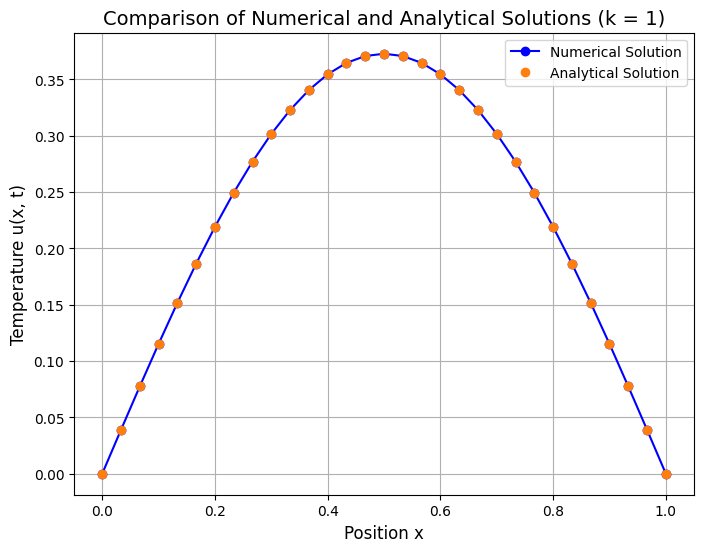

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Numerical solution function
def solve(L, T, k, N, M):
    dx = L / N
    dt = T / M
    alpha = k * dt / dx**2

    x = np.arange(0, L + 0.001, dx)

    u0 = np.zeros_like(x)
    u1 = np.zeros_like(x)

    # Initial condition
    for i in range(N + 1):
        u0[i] = np.sin(np.pi * x[i])

    # Time-stepping loop
    for j in range(M):
        for i in range(1, N):
            u1[i] = u0[i] + alpha * (u0[i + 1] - 2 * u0[i] + u0[i - 1])
        u1[0] = 0
        u1[N] = 0
        u0 = u1.copy()

    return x, u1

# Plotting function with headings
def plot(x, sol, u):
    plt.figure(figsize=(8, 6))
    plt.plot(x, u, 'bo-', label='Numerical Solution')  # Blue dots with line
    plt.plot(x, sol, 'o', color='C1', label='Analytical Solution')  # Orange dots
    plt.title("Comparison of Numerical and Analytical Solutions (k = 1)", fontsize=14)  # Top heading
    plt.xlabel("Position x", fontsize=12)  # X-axis label
    plt.ylabel("Temperature u(x, t)", fontsize=12)  # Y-axis label (left-hand side)
    plt.legend()
    plt.grid()
    plt.show()

# Parameters
L = 1          # Length of the rod
T = 0.1        # Final time
k = 1          # Thermal diffusivity
N = 30         # Number of spatial steps
M = 1000       # Number of time steps

# Solve numerically
x, u = solve(L, T, k, N, M)

# Compute analytical solution
sol = [np.sin(np.pi * x_) * np.exp(-np.pi**2 * T) for x_ in x]

# Plot both solutions
plot(x, sol, u)
